In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
from nltk.corpus import stopwords
import string
from datetime import timedelta
import numpy as np
import emoji

__Read file with every stock name in NASDAQ and NYSE__

In [2]:
screener=pd.read_csv('nasdaq_screener.csv')

In [3]:
screener['first_name']=[x.split(" ")[0] for x in screener['Name']]  #take the first word of the name
screener.head(5)

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry;,first_name
0,A,Agilent Technologies Inc. Common Stock,$117.37,0.7300,0.626%,3.522431e+10,United States,1999.0,238458,Capital Goods,Electrical Products;,Agilent
1,AA,Alcoa Corporation Common Stock,$58.8621,3.0221,5.412%,1.085704e+10,NaN,2016.0,1864745,Basic Industries,Metal Fabrications;,Alcoa
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$9.81,0.0100,0.102%,1.226250e+09,NaN,2021.0,707,Finance,Business Services;,Ares
3,AACG,ATA Creativity Global American Depositary Shares,$1.07,-0.0050,-0.465%,3.381049e+07,China,NaN,943,Miscellaneous,Service to the Health Industry;,ATA
4,AACI,Armada Acquisition Corp. I Common Stock,$9.86,0.0000,0.00%,2.041957e+08,United States,2021.0,3,Finance,Diversified Financial Service;,Armada


__Read WallStreetBets posts__

In [4]:
df=pd.read_csv('reddit_wsb.csv',usecols=['title',"score","comms_num","body","timestamp"])
df.head(5)

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56


__Find stocks talked the most about in WSB: GME and AMC by far__

In [5]:
df2=df.copy()
df2['words']=[x.split(" ") for x in df2['title']]  #create list of words in the title

In [6]:
capital=re.compile(r'\b[A-Z]+\b')  #regex expression which captures all the blocks in capital letters

In [7]:
stocks = [capital.findall(df2['title'][i]) for i in range(len(df2))] #find all capital letter blocks in the text
stocks2 = [x for sublist in stocks for x in sublist]

In [8]:
sw_list = stopwords.words('english')+ ['amp',''," "]
vct = CountVectorizer(stop_words=sw_list+
                      ['WE', 'YOU', 'WISH', 'GO', 'IT', 'IS', 'ON', 'ALL', 'ARE', 'CAN', 'FOR', 'UP', 'DO', 'GET', 'ME', 'OUT', 'NOW', 'BE', 'ME', 'UK', 'RE', 'OR'],
                      lowercase=False) #some blocks in capital letters are not there because the company is mentioned
words = vct.fit_transform(stocks2)
word_counts = pd.DataFrame(words.sum(axis=0))
word_counts.columns = vct.get_feature_names()
word_counts = word_counts.T
word_counts = word_counts[0].sort_values(ascending=False)
word_counts.head(100)  #run the countvectorizer to determine the most mentioned capital letter blocks

GME        8553
AMC        3381
THE        2628
HOLD       1979
YOLO       1628
           ... 
TODAY       117
VIAC        115
SQUEEZE     114
BOUGHT      113
MARKET      112
Name: 0, Length: 100, dtype: int64

In [9]:
#get the list of all the words that appear more than 100 times in the title
total_words=list(word_counts.loc[word_counts>100].index) 

In [10]:
screener['found']=0  #determine which of the capital letter blocks are actually company names
for i in screener.index:
        if screener.Symbol[i] in total_words:
            screener.loc[i,"found"]=1

__24 companies which have more than 100 mentions in WSB__

In [11]:
#found=1 means that the company symbol is found in a reddit post more than 100 times
screener2=screener.loc[screener.found==1]  
screener2 #we'll make an analysis of these companies excusively

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry;,first_name,found
11,AAL,American Airlines Group Inc. Common Stock,$16.891,0.3210,1.937%,1.097096e+10,United States,NaN,10763741,Transportation,Air Freight/Delivery Services;,American,1
417,AMC,AMC Entertainment Holdings Inc. Class A Common...,$11.4601,-0.3799,-3.209%,5.922816e+09,NaN,2013.0,16441822,Consumer Services,Movies/Entertainment;,AMC,1
423,AMD,Advanced Micro Devices Inc. Common Stock,$92.13,3.4000,3.832%,1.499291e+11,United States,NaN,45183187,Technology,Semiconductors;,Advanced,1
660,ASO,Academy Sports and Outdoors Inc. Common Stock,$36.525,0.7150,1.997%,3.122306e+09,United States,2020.0,264370,Consumer Non-Durables,Recreational Products/Toys;,Academy,1
885,BB,BlackBerry Limited Common Stock,$5.21,0.0200,0.385%,3.003424e+09,Canada,NaN,1623949,NaN,;,BlackBerry,1
1678,CLF,Cleveland-Cliffs Inc. Common Stock,$22.51,0.4900,2.225%,1.181183e+10,United States,NaN,3868203,NaN,;,Cleveland-Cliffs,1
1690,CLNE,Clean Energy Fuels Corp. Common Stock,$4.38,0.1600,3.791%,9.757660e+08,United States,2007.0,1018628,Public Utilities,Natural Gas Distribution;,Clean,1
1694,CLOV,Clover Health Investments Corp. Class A Common...,$2.40,0.0300,1.266%,1.057680e+09,United States,NaN,4335197,Health Care,Medical Specialities;,Clover,1
1937,CRSR,Corsair Gaming Inc. Common Stock,$14.865,-0.1350,-0.90%,1.418120e+09,United States,2020.0,172228,Technology,Computer Manufacturing;,Corsair,1
2155,DD,DuPont de Nemours Inc. Common Stock,$65.12,1.8000,2.843%,3.311525e+10,NaN,2017.0,591415,Capital Goods,Wholesale Distributors;,DuPont,1


__Read the stock price data for all of the 24 companies and clean__

In [12]:
for i in screener2.Symbol:  #data obtained in .csv format from  https://www.nasdaq.com/market-activity/stocks
    locals()[str(i)] = pd.read_csv("HistoricalData"+"_"+str(i)+".csv")  #read every .csv in a different DataFrame

In [13]:
for i in screener2.Symbol:
    locals()[i].Date =pd.to_datetime(locals()[i].Date) #convert date to datetime format

In [14]:
for i in screener2.Symbol: #filter stock data so that matches the timeline of the Reddit posts
    locals()[i]=locals()[i].loc[locals()[i].Date>min(df.timestamp)] 
    locals()[i]=locals()[i].loc[locals()[i].Date<max(df.timestamp)]

In [15]:
for i in screener2.Symbol: #stock prices are expressed in $. We need to remove that symbol
    locals()[i].iloc[:,1] = locals()[i].iloc[:,1].map(lambda x: x.lstrip('$'))
    locals()[i].iloc[:,3] = locals()[i].iloc[:,3].map(lambda x: x.lstrip('$'))
    locals()[i].iloc[:,4] = locals()[i].iloc[:,4].map(lambda x: x.lstrip('$'))
    locals()[i].iloc[:,5] = locals()[i].iloc[:,5].map(lambda x: x.lstrip('$'))

In [16]:
for i in screener2.Symbol:
    locals()[i].iloc[:,[1,3,4,5]]=locals()[i].iloc[:,[1,3,4,5]].astype(float) #data is in str format: convert to float
    locals()[i]["Diff"]=locals()[i].iloc[:,1]-locals()[i].iloc[:,3]  #difference in the stock price in a single day
    locals()[i]["Diff_Pct"]=locals()[i].Diff/locals()[i].Open*100 #difference expressed in %
    locals()[i]["Var"]=locals()[i].High-locals()[i].Low  #maximum variance between stock prices in a single day

In [17]:
for i in screener2.Symbol:
    locals()[i]["Diff_Previous"]=locals()[i].Diff.shift(1)
    locals()[i]["Diff_Following"]=locals()[i].Diff.shift(-1)

__Run sentiment analysis__

In [18]:
sid = SentimentIntensityAnalyzer()

pol_scores_title = [sid.polarity_scores(x)['compound'] for x in df2['title']]  
pol_scores_body = [sid.polarity_scores(x)['compound'] for x in df2.loc[df2['body'].notna()]["body"]] 

df2['sentiment_title'] = pd.Series(pol_scores_title) #sentiment of the titles
df2['sentiment_body'] = 0 # we can't apply directly the sentiment of the body because not every post has a body

In [19]:
df2['sentiment_body'] = 0  # loop to insert the body sentiment score in the correct rows
i=0
j=0
while i<len(df2):
    if pd.isna(df2["body"][i]):
        i=i+1
    else:
        df2.loc[i,'sentiment_body']=pol_scores_body[j]
        i=i+1
        j=j+1            
    

In [20]:
df2['timestamp'] =pd.to_datetime(df2['timestamp'])   #convert timestamp to datetime in YYYY-MM-DD format
df2['timestamp']=[df2['timestamp'][i].strftime('%Y-%m-%d') for i in range(len(df2))]
df2

,title,score,comms_num,body,timestamp,words,sentiment_title,sentiment_body
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28,"[It's, not, about, the, money,, it's, about, s...",0.0000,0.0000
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28,"[Math, Professor, Scott, Steiner, says, the, n...",-0.7034,0.0000
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28,"[Exit, the, system]",0.0000,-0.4199
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28,"[NEW, SEC, FILING, FOR, GME!, CAN, SOMEONE, LE...",-0.3397,0.0000
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28,"[Not, to, distract, from, GME,, just, thought,...",0.2235,0.0000
...,...,...,...,...,...,...,...,...
53182,What I Learned Investigating SAVA FUD Spreaders,238,87,***TLDR: Three bitter scientists partnered up ...,2021-08-02,"[What, I, Learned, Investigating, SAVA, FUD, S...",-0.4278,-0.9641
53183,"Daily Popular Tickers Thread for August 02, 20...",228,1070,\nYour daily hype thread. Please keep the shit...,2021-08-02,"[Daily, Popular, Tickers, Thread, for, August,...",0.4215,0.5040
53184,Hitler reacts to the market being irrational,7398,372,NaN,2021-08-02,"[Hitler, reacts, to, the, market, being, irrat...",-0.3400,0.0000
53185,"Daily Discussion Thread for August 02, 2021",338,11688,Your daily trading discussion thread. Please k...,2021-08-02,"[Daily, Discussion, Thread, for, August, 02,, ...",0.0000,0.7476


__Calculate sentiment score, which takes into account the times the post has been upvoted__

In [21]:
#sentiment score is the sentiment of the title + body multiplied by the score of the post (metric chosen by me)
df2["sentiment_score"]=(df2["sentiment_title"]+df2["sentiment_body"])*(np.log(df2["score"]+1))

__Filter reddit posts which talk about these 24 companies and separate in different datasets__

In [22]:
for j in screener2.Symbol: #posts that have company symbol in their title
    locals()["Reddit_"+str(j)] = df2.loc[[str(j) in df2.title[i] for i in range(len(df2))]]

__Group posts by date and calculate aggregate sentiment score. Merge with stock price data__

In [23]:
for j in screener2.Symbol: #group by date and aggregate sentiment score
    locals()["Group_"+str(j)] = locals()["Reddit_"+str(j)].groupby("timestamp").sum("sentiment_score") 
    locals()["Group_"+str(j)]["Date"]=pd.to_datetime(locals()["Group_"+str(j)].index)

In [24]:
for j in screener2.Symbol: #merge the dataset. Outer merge, then remove all rows with NaN values in the sentiment and diff
    locals()["Merge_"+str(j)]=locals()[str(j)].merge(locals()["Group_"+str(j)], on="Date", how="outer")
    locals()["Merge_"+str(j)]=locals()["Merge_"+str(j)].loc[locals()["Merge_"+str(j)].sentiment_score.notna()]
    locals()["Merge_"+str(j)]=locals()["Merge_"+str(j)].loc[locals()["Merge_"+str(j)].Diff.notna()]
    locals()["Merge_"+str(j)]=locals()["Merge_"+str(j)].iloc[:,[0,2,6,7,8,9,10,15]]

In [25]:
Merge_GME

,Date,Volume,Diff,Diff_Pct,Var,Diff_Previous,Diff_Following,sentiment_score
2,2021-08-12,1319832.0,2.47,1.544909,6.9500,2.05,0.35,0.000000
3,2021-08-11,945428.0,0.35,0.220918,4.4300,2.47,-2.31,0.000000
5,2021-08-09,2249204.0,9.33,6.146245,14.0500,-2.31,-2.82,5.994438
7,2021-08-05,2412123.0,5.44,3.675676,12.3800,-2.82,-5.93,8.043202
8,2021-08-04,2393484.0,-5.93,-3.882669,12.0990,5.44,-3.99,5.318111
...,...,...,...,...,...,...,...,...
134,2021-02-03,42698510.0,-19.60,-17.498438,28.1499,-37.69,-50.76,363.659385
135,2021-02-02,78183070.0,-50.76,-36.061381,83.7799,-19.60,-91.56,197.075692
136,2021-02-01,37382150.0,-91.56,-28.923427,110.0000,-50.76,-54.71,191.801447
137,2021-01-29,50566060.0,-54.71,-14.408364,163.9800,-91.56,-71.40,355.901641


__Calculate the correlation between sentiment score and price difference in one day__

In [26]:
Corr=pd.DataFrame(screener2.Symbol).set_index("Symbol") #create the DataFrame which will include the correlation values
Corr["Volume"]=0
Corr["Diff"]=0
Corr["Diff_Pct"]=0
Corr["Diff_Previous"]=0
Corr["Diff_Following"]=0
Corr["Var"]=0
Corr["sentiment_score"]=0

In [27]:
for j in screener2.Symbol: #Insert correlations for each stock
    Corr.loc[str(j)]=locals()["Merge_"+str(j)].corr().iloc[-1,:]
Corr

,Volume,Diff,Diff_Pct,Diff_Previous,Diff_Following,Var,sentiment_score
Symbol,,,,,,,
AAL,-0.251528,0.435610,0.482328,0.038166,0.595841,-0.186438,1.0
AMC,0.317155,-0.121146,-0.208350,-0.039799,-0.007442,0.120988,1.0
AMD,0.430127,0.254086,0.215577,0.033321,0.432448,0.284738,1.0
ASO,0.070916,-0.389540,-0.363845,-0.048431,0.187626,0.334771,1.0
BB,0.385213,-0.184486,-0.160392,-0.044747,-0.586690,0.265698,1.0
CLF,0.751097,-0.257057,-0.255058,-0.112567,0.354351,0.352186,1.0
CLNE,0.532905,-0.079330,-0.088889,0.049982,-0.159219,0.056821,1.0
CLOV,0.522719,-0.304680,-0.248311,-0.255133,-0.368714,0.640768,1.0
CRSR,0.487554,0.389103,0.353401,-0.000152,-0.084119,0.088069,1.0


In [28]:
#All_Stocks=pd.DataFrame()
#for j in screener2.Symbol: #Insert correlations for each stock
#    All_Stocks=All_Stocks.append(locals()["Merge_"+str(j)])
#All_Stocks.corr().iloc[[-1],:]

In [64]:
np.transpose(pd.DataFrame(Corr.mean()))

,Volume,Diff,Diff_Pct,Diff_Previous,Diff_Following,Var,sentiment_score
0,0.320971,-0.123596,-0.098495,-0.083429,0.001677,0.245609,1.0


Results show the average correlation between sentiment score and Diff or Diff_Pct is close to 0! We can safely assume that reddit posts do not affect stock prices. 

Correlations among sentiment score and difference in the price in the previous day are also very low, and 0 with the difference price of the following day. We can assume based on these results that it is stock prices which have more influence in the redditers' mood and not the other way around. Though the influence is minimal

However, we found that sentiment analysis misclassifies several posts:

In [30]:
df2.iloc[19761,0] #example of post with a sentiment of -0.62 when it's actually positive towards GME

'Hold $GME to the moon 🚀🚀🚀. Don’t panic and listen to hacks like Ross Gerber. He is a Hedge Fund crony and a liar. 💎🤚'

In [31]:
df2.iloc[23892,0] #example of post with a score of -0.74 when it's actually positive towards GME

'Why the fuck are we acting like we lost? We made GME go from 4 to 400 and it took combined trading platforms to silence and cheat to bring it to 90.'

In [32]:
df2.iloc[36929,0] #example of post with a score of -0.61 when it's actually positive towards GME

'UPDATE. $GME broke through the pennant. Next stop is the moon.'

__Visualize most common words__

In [35]:
from wordcloud import WordCloud

In [45]:
Allwords =[x+str(' ') for sublist in df2.words for x in sublist]

In [48]:
wordcloud = WordCloud(stopwords=sw_list +['one','said',"two"]).generate(Allwords)

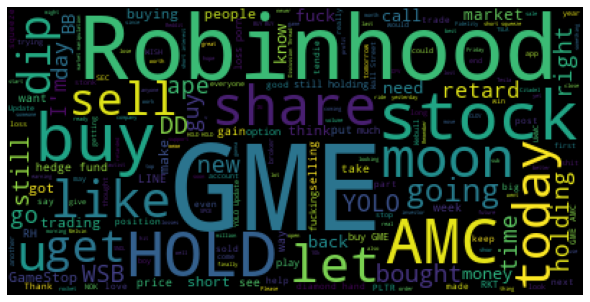

In [49]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

[[],
 ['DISASTER'],
 [],
 ['NEW',
  'SEC',
  'FILING',
  'FOR',
  'GME',
  'CAN',
  'SOMEONE',
  'LESS',
  'RETARDED',
  'THAN',
  'ME',
  'PLEASE',
  'INTERPRET'],
 ['GME', 'AMC'],
 ['WE', 'BREAKING', 'THROUGH'],
 ['SHORT', 'STOCK', 'DOESN', 'T', 'HAVE', 'AN', 'EXPIRATION', 'DATE'],
 ['THIS', 'IS', 'THE', 'MOMENT'],
 ['AMC', 'NOK', 'I', 'I', 'GME'],
 ['I', 'BRUH', 'I', 'TO', 'THE', 'MOON'],
 [],
 ['GME'],
 ['GME', 'AG', 'SLV'],
 ['GME'],
 ['I'],
 ['GME'],
 [],
 ['I'],
 ['SEC'],
 [],
 ['GME'],
 [],
 [],
 ['I'],
 ['GME', 'TO', 'THE', 'MOON'],
 ['I', 'GME', 'AMC'],
 ['I', 'GME'],
 ['Y'],
 ['JUST',
  'PUT',
  'IN',
  'ANOTHER',
  'IN',
  'NOK',
  'CALLS',
  'LET',
  'S',
  'GO',
  'GME',
  'NOK',
  'BUY',
  'AND',
  'HOLD'],
 ['I'],
 [],
 ['HOLD'],
 ['GME'],
 ['I', 'I', 'PLTR', 'BB', 'GME', 'NOK', 'SU', 'RIDE', 'I'],
 [],
 ['GME'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['GME', 'NYSE'],
 ['FIZZ'],
 ['GME', 'I'],
 ['THE', 'DARK', 'STOCK', 'RISES'],
 ['GME'],
 ['OG'],
 [],
 ['GME'],
 ['MOD'],
 [],


In [62]:
df2.sort_values("sentiment_score", ascending=True).iloc[0,0]

'Today wasn’t a bloodbath for $GME or $AMC. WE watched LITERAL insanity as Hedgies sat and traded their trash BACK and forth to each other in order to cause YOU to panic. HOLD. BUY.'